In [1]:
## This file is used to split data into series of arrays and their corresponding MI task.
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
file = sio.loadmat('../mat_files/CLA-SubjectJ-170508-3St-LRHand-Inter.mat') #replace with .mat file name
header=file['__header__']
version=file['__version__']
glob=file['__globals__']
ans=file['ans']


x=file['x']
o=file['o'][0][0]
data=o['data']
data = np.transpose(data)
print(data)
nS=o['nS'][0][0]
#values of structure seem to be 2D numpy arrays, if originally a scalar in Matlab.
#use [0][0] to get scalar.
print("Number of samples: {numSamples}".format(numSamples=nS))
test=o['id'][0] #id value became a 1D array of size 1 for some reason. use [0] to get value
print("Dataset ID: {id}".format(id=test))
chnames=o['chnames'][:,0] #[:,0] converts from 2D array back to 1D array
print("Channel names: {channelNames}".format(channelNames=chnames))
markers = o['marker']
## The markers are all still individual arrays of size 1x1, so we convert them to an array with single values
markersArray = []
for marker in markers:
    markersArray.append(marker[0])
markersArray = np.asarray(markersArray)
#For this dataset, the markers are 0, 1, or 2.
# 1 - Left Hand MI, 2 - Right Hand MI, 3 - Passive State, 0 - Rest (???)

[[-18.   -3.6  -6.6 ...  -9.   -7.2  -2.4]
 [-19.2  -0.   -8.4 ...  -8.4 -11.4  -9. ]
 [-12.    1.8  -1.2 ...   2.4   3.6   5.4]
 ...
 [ -6.    5.4   3.  ...   5.4   4.2   3.6]
 [ -8.4   7.2   3.  ...   4.8   6.6   6. ]
 [ -1.2  -1.2  -1.8 ...  -0.   -0.   -0. ]]
Number of samples: 621892
Dataset ID: 201705081338.32BEA9DD
Channel names: [array(['Fp1'], dtype='<U3') array(['Fp2'], dtype='<U3')
 array(['F3'], dtype='<U2') array(['F4'], dtype='<U2')
 array(['C3'], dtype='<U2') array(['C4'], dtype='<U2')
 array(['P3'], dtype='<U2') array(['P4'], dtype='<U2')
 array(['O1'], dtype='<U2') array(['O2'], dtype='<U2')
 array(['A1'], dtype='<U2') array(['A2'], dtype='<U2')
 array(['F7'], dtype='<U2') array(['F8'], dtype='<U2')
 array(['T3'], dtype='<U2') array(['T4'], dtype='<U2')
 array(['T5'], dtype='<U2') array(['T6'], dtype='<U2')
 array(['Fz'], dtype='<U2') array(['Cz'], dtype='<U2')
 array(['Pz'], dtype='<U2')]


In [2]:
## Find the starting indeces where the marker changes
changeIdxs = np.where(np.transpose(markersArray)[:-1] != np.transpose(markersArray)[1:])[0]
print("Number of index changes: {idxChanges}".format(idxChanges=changeIdxs.shape[0]))
## Split the data so that it has its matching marker
dataSplit = np.array_split(data, changeIdxs[:-1], axis=1)
splitCount = 0
for splitData in dataSplit:
    splitCount += 1
print("Number of arrays in data split: {num}".format(num=splitCount))
## Retrieve the marker values for each of the change indeces (changeIdxs)
markerTargets = markersArray[changeIdxs];
print("Number of marker targets: {numTargets}".format(numTargets=markerTargets.shape[0]))

Number of index changes: 1800
Number of arrays in data split: 1800
Number of marker targets: 1800


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


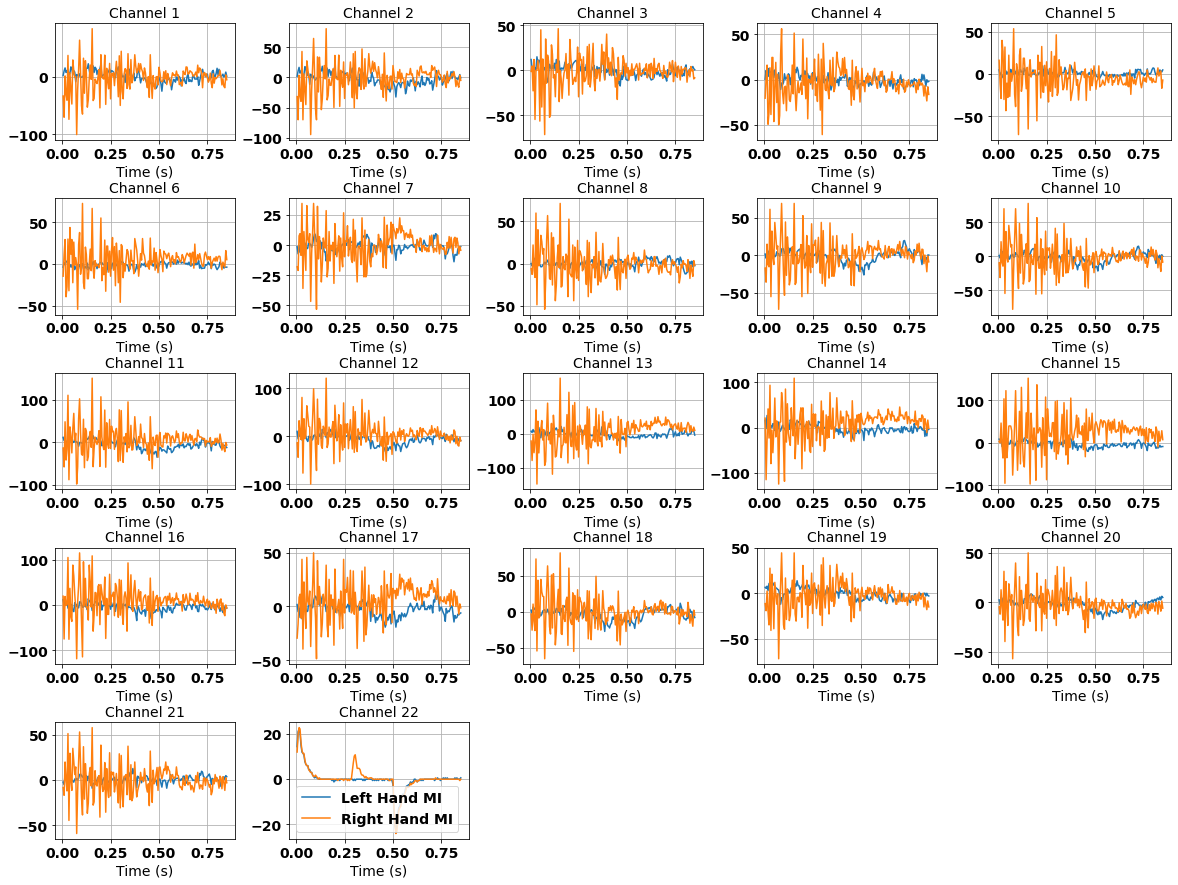

In [23]:
## Each element in dataSplit list has each channel of data as a sublist, with its matching marker
## Plot the first 3 channels of the data for the first left hand MI Task
sf = 200; #200 Hz sampling frequency
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

timeSteps = np.linspace(1, 170, 170);
timeSteps = timeSteps / sf;
firstLeftHandMIIdx = np.where(markerTargets==1)[0][0]
firstRightHandMIIdx = np.where(markerTargets==2)[0][0]
exampleData = dataSplit[firstLeftHandMIIdx]
exampleData2 = dataSplit[firstRightHandMIIdx]
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for num in range(0,exampleData.shape[0]):
    plt.subplot(5,5,num+1)
    plt.plot(timeSteps, exampleData[num,:])
    #plt.hold(True)
    plt.plot(timeSteps, exampleData2[num,:])
    plt.title("Channel {chNum}".format(chNum=num+1),fontdict = {'fontsize' : 14})
    plt.xlabel("Time (s)")
    plt.grid()
    if(num == 21):
        plt.legend(['Left Hand MI', 'Right Hand MI'])
plt.show()

In [133]:
exampleData.shape

(22, 170)